# Entrainement d'un modèle

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

In [9]:
data_hotel = pd.read_csv("clean_data.csv")
data_hotel.head()

,lead_time,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,nb_persons,nb_nights,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,1.609764,0.839446,-0.161398,-1.125010,-0.794241,0.100908,0.008417,-0.060132,-0.100847,-0.242851,1.568506,-1.338085,1.0
1,-0.937707,1.166097,-0.161398,0.117871,0.442749,0.100908,1.190305,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,1.0
2,-0.984236,-1.773767,-0.161398,-1.274108,-0.794241,-1.492329,0.008417,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
3,1.458545,-0.793812,-0.161398,-0.081324,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
4,-0.437518,-1.120464,-0.161398,-0.245332,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0


In [10]:
X = data_hotel.drop(['booking_status_Not_Canceled'], axis=1)
y = data_hotel['booking_status_Not_Canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## KNN

In [11]:
knn = KNeighborsClassifier()

# Split données:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Entraînement
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

#Test
print("Accuracy : ", knn.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy :  0.8550505050505051
Precision :  0.8773927792585413
Rappel :  0.9107142857142857


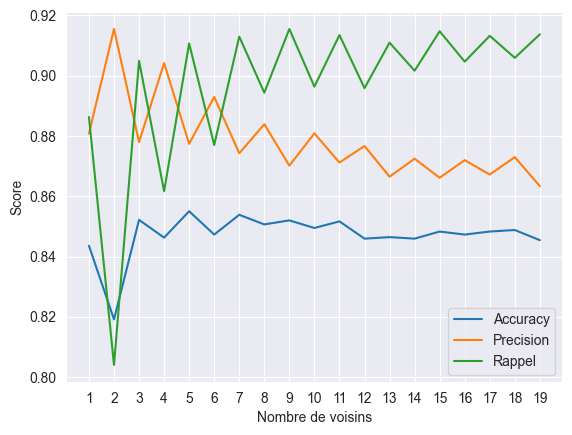

Score maximum pour k = 5


In [12]:
accuracies = []
precisions = []
recalls = []
k_range = range(1,20)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

plt.plot(k_range, accuracies, label='Accuracy')
plt.plot(k_range, precisions, label='Precision')
plt.plot(k_range, recalls, label='Rappel')
plt.xticks(range(1, 20))
plt.xlabel('Nombre de voisins')
plt.ylabel('Score')
plt.legend()
plt.show()

k_max = np.argmax(accuracies) + 1
print("Score maximum pour k =", k_max)

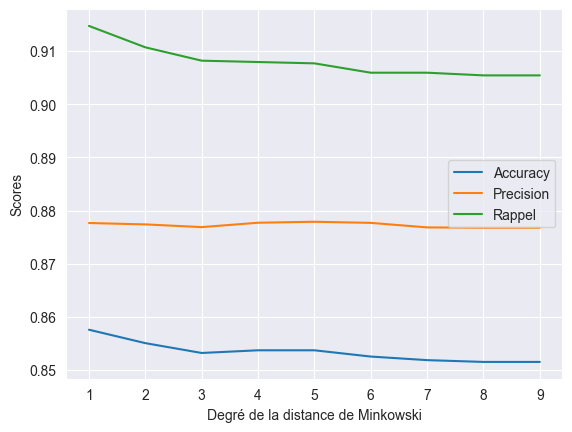

Score maximum pour p = 1


In [13]:
accuracies = []
precisions = []
recalls = []

p_range = range(1,10)

for dim in p_range:
    knn = KNeighborsClassifier(n_neighbors=k_max, p=dim)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

plt.plot(p_range, accuracies, label='Accuracy')
plt.plot(p_range, precisions, label='Precision')
plt.plot(p_range, recalls, label='Rappel')
plt.xticks(p_range)
plt.xlabel('Degré de la distance de Minkowski')
plt.ylabel('Scores')
plt.legend()
plt.show()

prof_max = np.argmax(accuracies) + 1
print("Score maximum pour p =", prof_max)

# sauvegarde des scores
knn_best_accuracy = accuracies[prof_max-1]
knn_best_pred = precisions[prof_max-1]
knn_best_recall = recalls[prof_max-1]

meilleur accuracy: 0.8576
meilleur precision: 0.8777
meilleur rappel: 0.9147


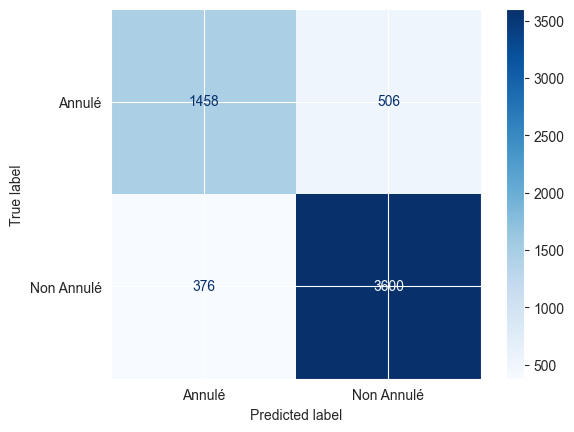

In [16]:

# Afficher la matrice
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Annulé', 'Non Annulé'])
disp.plot(cmap='Blues')
print('meilleur accuracy:', round(knn_best_accuracy,4))
print('meilleur precision:', round(knn_best_pred,4))
print('meilleur rappel:', round(knn_best_recall,4))